# K-Means

## Masukkan dataset

In [13]:
import pandas as pd

# Load the uploaded dataset
file_path = '/content/API_FP.CPI.TOTL_DS2_en_csv_v2_284.csv'
data = pd.read_csv(file_path, skiprows=4)  # Skipping metadata rows for World Bank dataset

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            65 non-null     float64
 5   1961            67 non-null     float64
 6   1962            68 non-null     float64
 7   1963            72 non-null     float64
 8   1964            77 non-null     float64
 9   1965            82 non-null     float64
 10  1966            87 non-null     float64
 11  1967            88 non-null     float64
 12  1968            89 non-null     float64
 13  1969            92 non-null     float64
 14  1970            95 non-null     float64
 15  1971            97 non-null     float64
 16  1972            99 non-null     float64
 17  1973            100 non-null    flo

(                  Country Name Country Code  \
 0                        Aruba          ABW   
 1  Africa Eastern and Southern          AFE   
 2                  Afghanistan          AFG   
 3   Africa Western and Central          AFW   
 4                       Angola          AGO   
 
                       Indicator Name Indicator Code  1960  1961  1962  1963  \
 0  Consumer price index (2010 = 100)    FP.CPI.TOTL   NaN   NaN   NaN   NaN   
 1  Consumer price index (2010 = 100)    FP.CPI.TOTL   NaN   NaN   NaN   NaN   
 2  Consumer price index (2010 = 100)    FP.CPI.TOTL   NaN   NaN   NaN   NaN   
 3  Consumer price index (2010 = 100)    FP.CPI.TOTL   NaN   NaN   NaN   NaN   
 4  Consumer price index (2010 = 100)    FP.CPI.TOTL   NaN   NaN   NaN   NaN   
 
    1964  1965  ...        2015        2016        2017        2018  \
 0   NaN   NaN  ...  103.401365  102.438495  101.385139  105.061406   
 1   NaN   NaN  ...         NaN         NaN         NaN         NaN   
 2   NaN   NaN 

## Splitting dataset 80:20

In [14]:
# prompt: split dataset training dan testnya menjadi 80:20

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the uploaded dataset
file_path = '/content/API_FP.CPI.TOTL_DS2_en_csv_v2_284.csv'
data = pd.read_csv(file_path, skiprows=4)  # Skipping metadata rows for World Bank dataset

# Assuming you want to split based on rows, not specific columns
# Define features (X) and target variable (y) if you have a target
# For example, if 'Value' is your target:

# X = data.drop('Value', axis=1) # Assuming "Value" is the target column
# y = data['Value']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you don't have a specific target variable and just want to split the DataFrame:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

# Now you have train_data and test_data

Training data shape: (212, 69)
Testing data shape: (54, 69)


## Pre-processing data

### Imputasi data ( mengisi data kosong dengan nilai rata - rata)

In [15]:
from sklearn.impute import SimpleImputer

# Drop irrelevant columns
data_cleaned = data.drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code", "Unnamed: 68"])

# Transpose years into rows for easier analysis (using only valid columns)
data_cleaned.set_index(data["Country Name"], inplace=True)

# Remove rows (countries) or columns (years) with too many missing values
data_cleaned = data_cleaned.loc[:, data_cleaned.isnull().mean() < 0.5]  # Remove years with >50% missing values
data_cleaned.dropna(thresh=int(0.5 * data_cleaned.shape[1]), inplace=True)  # Keep countries with >50% data

# Impute remaining missing values using mean
imputer = SimpleImputer(strategy="mean")
data_imputed = pd.DataFrame(imputer.fit_transform(data_cleaned), columns=data_cleaned.columns, index=data_cleaned.index)

# Display summary of cleaned data
data_imputed.info(), data_imputed.head()


<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, Aruba to Zambia
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    176 non-null    float64
 1   1991    176 non-null    float64
 2   1992    176 non-null    float64
 3   1993    176 non-null    float64
 4   1994    176 non-null    float64
 5   1995    176 non-null    float64
 6   1996    176 non-null    float64
 7   1997    176 non-null    float64
 8   1998    176 non-null    float64
 9   1999    176 non-null    float64
 10  2000    176 non-null    float64
 11  2001    176 non-null    float64
 12  2002    176 non-null    float64
 13  2003    176 non-null    float64
 14  2004    176 non-null    float64
 15  2005    176 non-null    float64
 16  2006    176 non-null    float64
 17  2007    176 non-null    float64
 18  2008    176 non-null    float64
 19  2009    176 non-null    float64
 20  2010    176 non-null    float64
 21  2011    176 non-null    float64
 22  

(None,
                              1990          1991          1992       1993  \
 Country Name                                                               
 Aruba                4.929959e+01  5.203846e+01  5.405411e+01  56.873330   
 Angola               2.220082e-08  4.080150e-08  1.630060e-07   0.000002   
 Albania              3.534477e+01  5.114552e+00  1.667372e+01  30.847167   
 Armenia              3.534477e+01  3.641514e+01  3.755414e+01   0.462030   
 Antigua and Barbuda  3.534477e+01  3.641514e+01  3.755414e+01  39.718950   
 
                           1994       1995       1996       1997       1998  \
 Country Name                                                                 
 Aruba                60.462651  62.495038  64.510683  66.445970  67.688169   
 Angola                0.000025   0.000700   0.029713   0.094837   0.196583   
 Albania              37.807846  40.754294  45.940473  61.183648  73.813702   
 Armenia              16.049821  44.289694  52.563534  59

### Normalisasi data

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_imputed),
                               columns=data_imputed.columns,
                               index=data_imputed.index)

# Display a preview of the normalized data
data_normalized.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,5.214994e-01,5.331370e-01,0.544208,0.565561,0.597101,0.617960,0.617355,0.644536,0.651916,0.667565,...,0.014919,0.018100,0.014003,0.006977,0.007426,0.008439,0.022734,0.010321,0.008366,0.055030
Angola,2.304737e-10,3.225907e-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.193404,0.212978,0.331122,0.386552,0.284474,0.225328,0.106200,0.029993,0.015664,0.344120
Albania,3.738829e-01,5.239887e-02,0.167868,0.306751,0.373373,0.402982,0.439560,0.593418,0.711083,0.714987,...,0.041452,0.045775,0.044971,0.037575,0.023015,0.016080,0.006441,0.001489,0.000763,0.055030
Armenia,3.738829e-01,3.730751e-01,0.378089,0.004595,0.158500,0.437941,0.502971,0.580966,0.626885,0.631405,...,0.086782,0.092047,0.075395,0.058045,0.035587,0.024213,0.009278,0.002523,0.001293,0.024982
Antigua and Barbuda,3.738829e-01,3.730751e-01,0.378089,0.394974,0.433980,0.473778,0.487971,0.520243,0.766679,0.776930,...,0.041190,0.042046,0.035906,0.031737,0.018483,0.013179,0.005039,0.001186,0.000653,0.014512


## Model K-Means

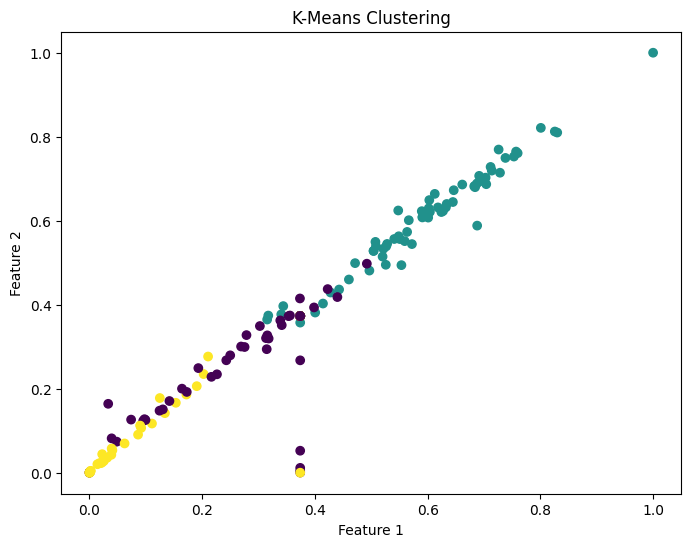

In [17]:
# prompt: lakukan proses training dari data yang telah diatas menggunakan algoritma KMeans, dan visualnya. pastikan mode kmeans sudah fit

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data_normalized' is your preprocessed data ready for clustering
# Select a suitable number of clusters (e.g., 3)
n_clusters = 3

# Create a KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(data_normalized)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to your DataFrame
data_normalized['Cluster'] = cluster_labels

# Visualize the clusters (for example, using the first two principal components)
# You can use PCA for dimensionality reduction if needed

plt.figure(figsize=(8, 6))
plt.scatter(data_normalized.iloc[:, 0], data_normalized.iloc[:, 1], c=data_normalized['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


# You can also analyze the characteristics of each cluster by looking at the mean values of features within each cluster
# For example:
# print(data_normalized.groupby('Cluster').mean())

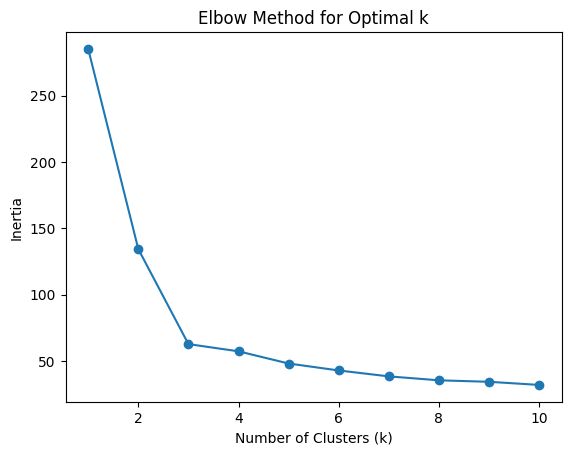

In [18]:
# prompt: lanjutkan dari kode diatas ,cari nilai k yang optimal

# ... (Your existing code) ...

# Elbow Method to find optimal k
inertias = []
for k in range(1, 11):  # Test k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Determine the optimal k based on the elbow point in the graph
# The optimal k is the point where the inertia starts to decrease less significantly

# You can also use the Silhouette Score for a more robust evaluation of k
# from sklearn.metrics import silhouette_score

# silhouette_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     clusters = kmeans.fit_predict(data_normalized)
#     silhouette_scores.append(silhouette_score(data_normalized, clusters))

# plt.plot(range(2, 11), silhouette_scores, marker='o')
# plt.title('Silhouette Score for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.show()

# The optimal k is the one that maximizes the silhouette score

# After finding the optimal k, re-run the KMeans clustering with the chosen k
# ... (Your existing KMeans code with the optimal k) ...

## Rata rata siluet Scorenya

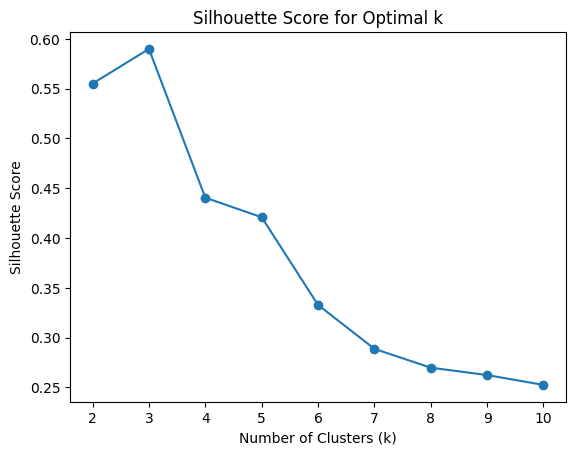

For k=2, the average silhouette score is: 0.555112764731665
For k=3, the average silhouette score is: 0.5899091257809206
For k=4, the average silhouette score is: 0.44051601705486915
For k=5, the average silhouette score is: 0.420912034592236
For k=6, the average silhouette score is: 0.3328346623256861
For k=7, the average silhouette score is: 0.28870503893370153
For k=8, the average silhouette score is: 0.26980537944479477
For k=9, the average silhouette score is: 0.2623757859703107
For k=10, the average silhouette score is: 0.2524706376750588

The optimal number of clusters (k) based on the silhouette score is: 3
The average silhouette score for the optimal k is: 0.5899091257809206


In [27]:
# prompt: berapa rata rata siluet scorenya?

from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_normalized)
    silhouette_scores.append(silhouette_score(data_normalized, clusters))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Print the average silhouette score for each k
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"For k={k}, the average silhouette score is: {score}")

# The optimal k is the one that maximizes the silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because the range starts from 2

print(f"\nThe optimal number of clusters (k) based on the silhouette score is: {optimal_k}")
print(f"The average silhouette score for the optimal k is: {max(silhouette_scores)}")

## Naikkan Silhoutte Score


In [31]:
# prompt: naikkan hasil siluet scorenya, dan visualisasikan

# ... (Your existing code) ...

# ## Naikkan Silhoutte Score

# Try different preprocessing techniques
# 1. Standardization:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data_imputed),
                                columns=data_imputed.columns,
                                index=data_imputed.index)

# 2. Robust Scaler (less sensitive to outliers):
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_robust = pd.DataFrame(scaler.fit_transform(data_imputed),
                            columns=data_imputed.columns,
                            index=data_imputed.index)


# Test different preprocessing methods
for data_scaled, scaler_name in zip([data_normalized, data_standardized, data_robust],
                                  ['MinMaxScaler', 'StandardScaler', 'RobustScaler']):

    silhouette_scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Increased n_init
        clusters = kmeans.fit_predict(data_scaled)
        silhouette_scores.append(silhouette_score(data_scaled, clusters))

    optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
    print(f"\nResults for {scaler_name}:")
    for k, score in zip(range(2, 11), silhouette_scores):
        print(f"For k={k}, the average silhouette score is: {score}")

    print(f"The optimal number of clusters (k) is: {optimal_k}")
    print(f"The average silhouette score for the optimal k is: {max(silhouette_scores)}")

    # Visualize the clusters for the best scaler and k
    if scaler_name == 'RobustScaler' and optimal_k == 3: # Customize based on your best result
      kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
      kmeans.fit(data_scaled)
      cluster_labels = kmeans.labels_
      data_scaled['Cluster'] = cluster_labels
      plt.figure(figsize=(8, 6))
      plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], c=data_scaled['Cluster'], cmap='viridis')
      plt.xlabel('Feature 1')
      plt.ylabel('Feature 2')
      plt.title(f'K-Means Clustering with {scaler_name} and optimal k = {optimal_k}')
      plt.show()


Results for MinMaxScaler:
For k=2, the average silhouette score is: 0.5888141261678593
For k=3, the average silhouette score is: 0.5980734064576615
For k=4, the average silhouette score is: 0.5915082643660937
For k=5, the average silhouette score is: 0.44690500359481133
For k=6, the average silhouette score is: 0.33346577068018296
For k=7, the average silhouette score is: 0.28870503893370153
For k=8, the average silhouette score is: 0.26980537944479477
For k=9, the average silhouette score is: 0.2661541467943671
For k=10, the average silhouette score is: 0.2694444986023083
The optimal number of clusters (k) is: 3
The average silhouette score for the optimal k is: 0.5980734064576615

Results for StandardScaler:
For k=2, the average silhouette score is: 0.44743007112607186
For k=3, the average silhouette score is: 0.4487469790241345
For k=4, the average silhouette score is: 0.44325393505480953
For k=5, the average silhouette score is: 0.33588519803530653
For k=6, the average silhouette 

## Save Model

In [32]:
# prompt: save model

import pickle

# Assuming 'kmeans' is your trained KMeans model
# and you want to save it to a file named 'kmeans_model.pkl'

filename = 'kmeans_model.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

# Later, you can load the saved model like this:
# loaded_model = pickle.load(open(filename, 'rb'))

## Testing data

In [34]:
# prompt: negara mana dengan tingkat inflasi yang paling tinggi di tahun 2023 dari yang tertinggi hingga ke yang terendah

# Filter data for the year 2023
data_2023 = data_imputed[['2023']]

# Sort the data by inflation rate in descending order
data_2023_sorted = data_2023.sort_values('2023', ascending=False)

# Print the countries with the highest inflation rate in 2023
print("Negara dengan tingkat inflasi tertinggi di tahun 2023 (dari yang tertinggi hingga terendah):")
data_2023_sorted

Negara dengan tingkat inflasi tertinggi di tahun 2023 (dari yang tertinggi hingga terendah):


,2023
Country Name,
"Iran, Islamic Rep.",2140.219429
Ethiopia,858.423452
Turkiye,834.593143
Angola,804.965533
Malawi,773.939572
...,...
Grenada,114.381236
Japan,111.364036
St. Kitts and Nevis,110.823846


In [35]:
# prompt: segmentasi data berdasarkan konsumer price tiap negara, consumer price nya berapa , clusternya berapa.

# Assuming data_normalized is your DataFrame with 'Cluster' column and years as columns
# Get the latest year available in your data
latest_year = data_normalized.columns[-2]  # Adjust the index if needed

# Create a new DataFrame to store the results
consumer_price_by_country = pd.DataFrame()

# Iterate through each cluster
for cluster in data_normalized['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = data_normalized[data_normalized['Cluster'] == cluster]

    # Get the average consumer price for each country within the cluster
    # in the latest year
    cluster_data['Latest_Consumer_Price'] = cluster_data[latest_year] # Assuming latest year column is numerical

    # Append the data for the current cluster to the result DataFrame
    consumer_price_by_country = pd.concat([consumer_price_by_country, cluster_data[['Latest_Consumer_Price', 'Cluster']]])

# Print the consumer prices and clusters
consumer_price_by_country

<ipython-input-35-e90bfb0fb955>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Latest_Consumer_Price'] = cluster_data[latest_year] # Assuming latest year column is numerical
<ipython-input-35-e90bfb0fb955>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Latest_Consumer_Price'] = cluster_data[latest_year] # Assuming latest year column is numerical
<ipython-input-35-e90bfb0fb955>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Latest_Consumer_Price,Cluster
Country Name,,
Aruba,1,1
Antigua and Barbuda,1,1
Australia,1,1
Austria,1,1
Belgium,1,1
...,...,...
Uganda,0,0
Viet Nam,0,0
Samoa,0,0


In [36]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClusterMixin

# Define a custom scorer for silhouette score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Define the parameter grid
param_grid = {
    'n_clusters': list(range(2, 11)),
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 500],
}

# Create a KMeans object
kmeans = KMeans(random_state=42)

# Use GridSearchCV with the custom scorer
grid_search = GridSearchCV(kmeans, param_grid, scoring=silhouette_scorer, cv=5)
grid_search.fit(data_normalized)

# Display the results
print("Best hyperparameters:", grid_search.best_params_)
print("Best silhouette score:", grid_search.best_score_)


Best hyperparameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 3, 'n_init': 10}
Best silhouette score: 0.6004888240050372


## testing model for clustering

In [37]:
# prompt: load model and test for clustering, rank countries from highest to lowest inflation rates, include the score silhouette
import pickle

# Load the saved KMeans model
filename = 'kmeans_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

loaded_model.fit(data_normalized)

# Assuming data_normalized is your preprocessed DataFrame
clusters = loaded_model.predict(data_normalized)

# Add cluster labels to the DataFrame
data_normalized['Cluster'] = clusters

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_normalized, clusters)
print("The average silhouette_score is :", silhouette_avg)


# Filter data for the year 2023
data_2023 = data_imputed[['2023']]

# Sort the data by inflation rate in descending order
data_2023_sorted = data_2023.sort_values('2023', ascending=False)

# Print the countries with the highest inflation rate in 2023
print("Negara dengan tingkat inflasi tertinggi di tahun 2023 (dari yang tertinggi hingga terendah):")
data_2023_sorted

The average silhouette_score is : 0.698378085954404
Negara dengan tingkat inflasi tertinggi di tahun 2023 (dari yang tertinggi hingga terendah):


,2023
Country Name,
"Iran, Islamic Rep.",2140.219429
Ethiopia,858.423452
Turkiye,834.593143
Angola,804.965533
Malawi,773.939572
...,...
Grenada,114.381236
Japan,111.364036
St. Kitts and Nevis,110.823846
